In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [14]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = path,
    labels="inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256),
    validation_split=0.2,
    subset="training" ,
    seed = 42
)

Found 50000 files belonging to 3 classes.
Using 40000 files for training.


In [15]:
# Create validation dataset (20% of data)
validation_ds = keras.utils.image_dataset_from_directory(
    directory=path,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,  # 20% data will be used for validation
    subset="validation",
    seed=42  # Same seed as training for consistency
)

Found 50000 files belonging to 3 classes.
Using 10000 files for validation.


In [16]:
# Normalization
#images are in mupy array fromat ranging from 0 to 255, normalize it to 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process).prefetch(buffer_size=tf.data.AUTOTUNE) # Add prefetch
validation_ds = validation_ds.map(process).prefetch(buffer_size=tf.data.AUTOTUNE) # Add prefetch

# CNN Model

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # Changed 'accuarcy' to 'accuracy'

In [20]:
history =  model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 82ms/step - accuracy: 0.1410 - loss: 5.3884 - val_accuracy: 0.1030 - val_loss: 0.4696
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 76ms/step - accuracy: 0.1059 - loss: 0.4253 - val_accuracy: 0.1028 - val_loss: 0.4193
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.1019 - loss: 0.3676 - val_accuracy: 0.1028 - val_loss: 0.3972
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 76ms/step - accuracy: 0.1018 - loss: 0.3729 - val_accuracy: 0.1028 - val_loss: 0.3859
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 83ms/step - accuracy: 0.1013 - loss: 0.3697 - val_accuracy: 0.1028 - val_loss: 0.3913
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.1012 - loss: 0.3637 - val_accuracy: 0.1030 - val_loss: 0.5063
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 76ms/step - accuracy: 0.1023 - loss: 0.4069 - val_accuracy: 0.1028 - val_loss: 0.3830
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.

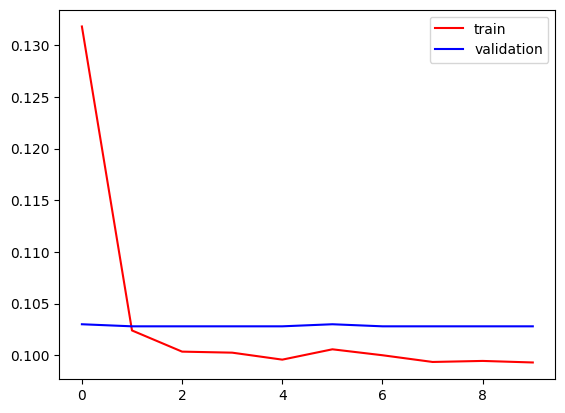

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

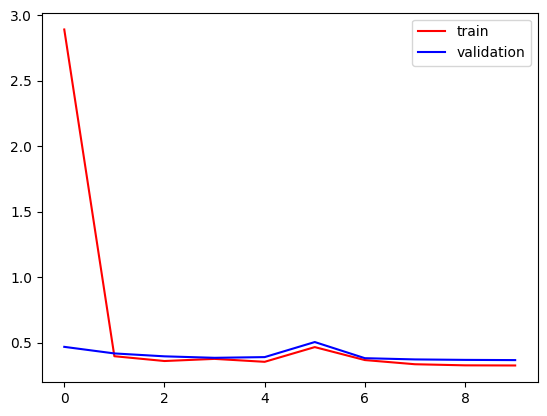

In [22]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

#ways to reduce overfitting

Add more data

data augmentation

L1/L2 regularization

Dropout

Batch Norm

Reduce complexity